In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from transit_periodogram.transit_periodogram import transit_periodogram

<Container object of 3 artists>

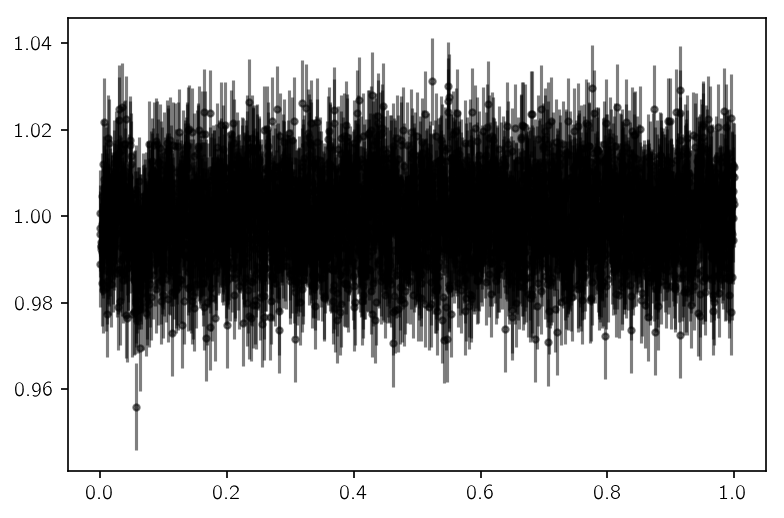

In [3]:
np.random.seed(41)

time = np.linspace(0, 60, 3000)

flux_err = 0.01+ np.zeros_like(time)
period = 5

transit_depth = 0.01
transit_duration = 0.125
transit_time = 2.5*transit_duration

flux = np.ones_like(time)
flux[np.abs((time - transit_time + 0.5*period) % period - 0.5*period) < 0.5*transit_duration] = 1.0 - transit_depth

flux += flux_err * np.random.randn(len(flux))

plt.errorbar((time%period)/period, flux, yerr=flux_err, fmt=".k", alpha=0.5)
# plt.xlim(0, );

In [4]:
df = 0.5 / (time.max() - time.min())
fmax = 0.1 / np.median(np.diff(time))
freq = np.arange(10*df, fmax, 0.02*df)
periods = 1.0 / freq
len(freq)

29491

In [5]:
periodogram, depth, depth_ivar, phase, durations, depth_snr, log_likelihood = \
    transit_periodogram(time, flux-np.median(flux), periods, transit_duration,
                        flux_err=flux_err)
ind = np.argmax(periodogram)
periods[ind], phase[ind], (transit_time)%period

(5.000000000000079, 0.3125, 0.3125)

In [6]:
%%timeit
periodogram, depth, depth_ivar, phase, durations, depth_snr, log_likelihood = \
    transit_periodogram(time, flux-np.median(flux), periods, transit_duration,
                        flux_err=flux_err)


1 loop, best of 3: 775 ms per loop


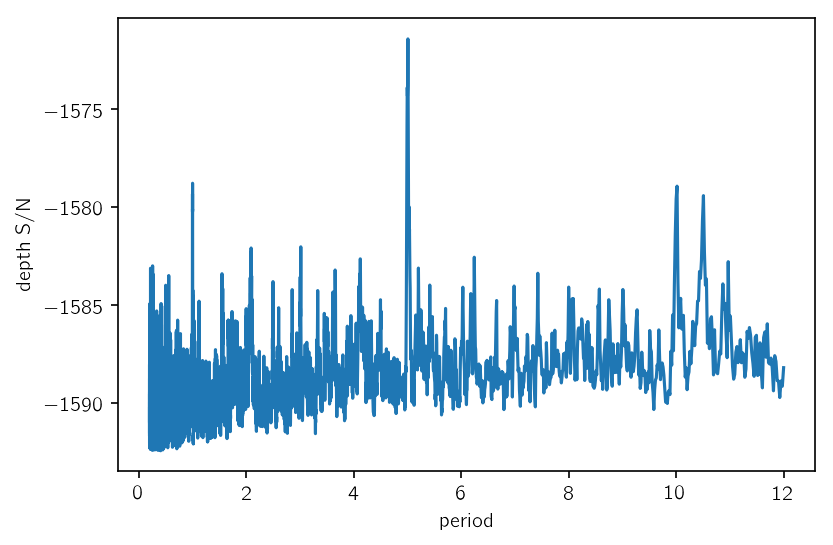

In [82]:
plt.plot(periods, periodogram)
plt.xlabel("period")
plt.ylabel("depth S/N");

In [25]:
periods, periodogram, log_likelihood, depth_snr, depth, depth_ivar, phase, best_durations = \
    transit_periodogram(time, flux, periods, [transit_duration, 0.5*transit_duration,
                                              10 * transit_duration],
                        flux_err=flux_err, method="likelihood")

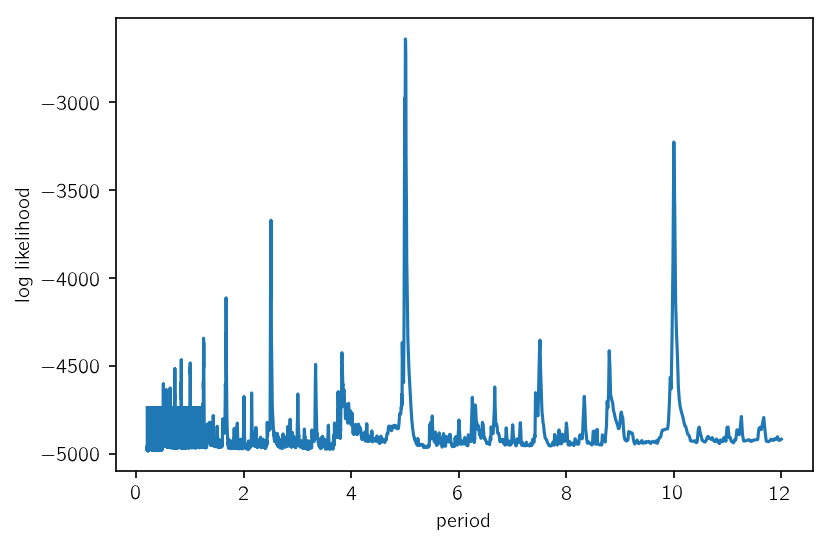

In [11]:
plt.plot(periods, periodogram)
plt.xlabel("period")
plt.ylabel("log likelihood");

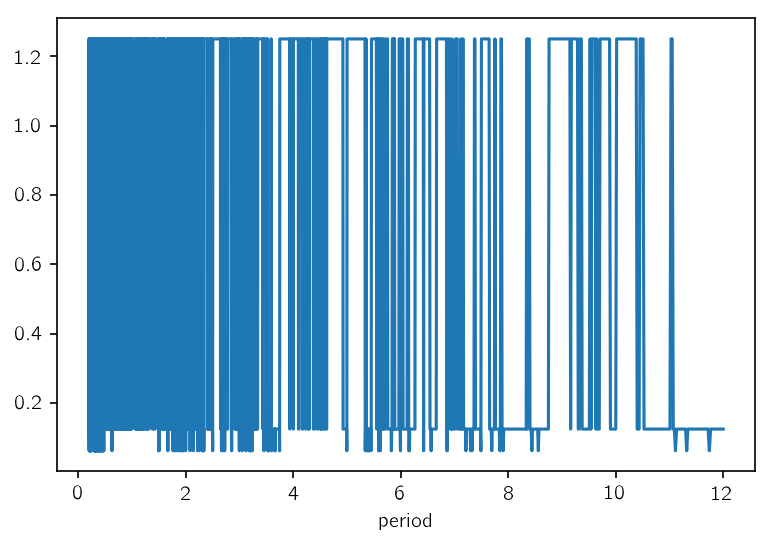

In [12]:
plt.plot(periods, best_durations)
plt.xlabel("period")
# plt.ylabel("log likelihood");

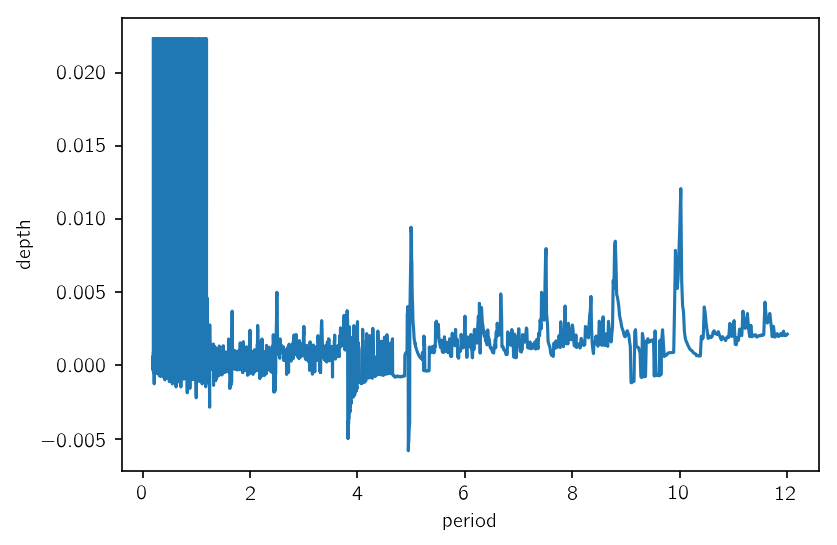

In [13]:
plt.plot(periods, depth)
plt.xlabel("period")
plt.ylabel("depth");

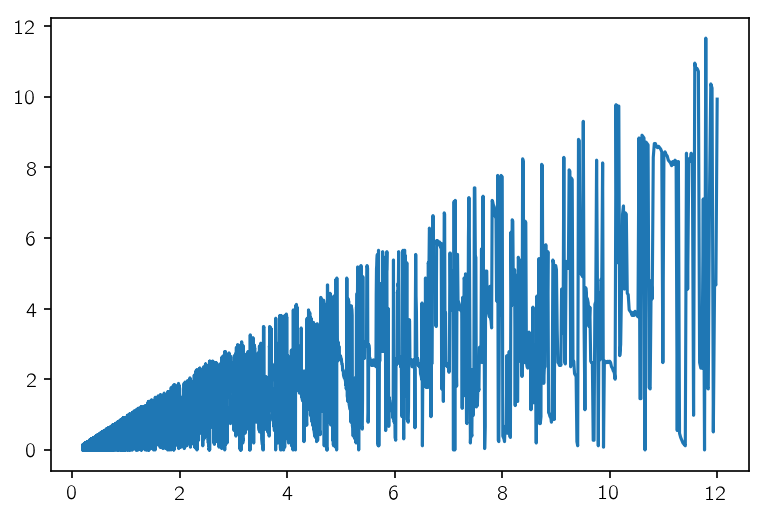

In [13]:
plt.plot(periods, phase)

In [14]:
ind = np.argmax(periodogram)
periods[ind], phase[ind], depth[ind]

(5.000000000000079, 2.5918139392115793, 0.010251703728149542)

In [15]:
period, transit_time

(5, 2.5)

In [16]:
len(freq), len(periods)

(29491, 29491)

In [17]:
import bls

In [18]:
%%timeit
u = np.empty_like(time)
v = np.empty_like(time)
nf = len(freq)
fmin = np.min(freq)
df = freq[1] - freq[0]
nb = 400
qmi = transit_duration/period
qma = transit_duration/period
results = bls.eebls(time, flux, u, v, nf, fmin, df, nb, qmi, qma)

1 loop, best of 3: 318 ms per loop


In [19]:
%%timeit
transit_periodogram(time, flux, periods, transit_duration, flux_err=flux_err)

1 loop, best of 3: 725 ms per loop
